# Task 1. Set up an “Analysis Pipeline” (20%)¶
Each person in a group should do this Task in their own Jupyter notebook!

Often when Data Scientists do analyses with the same or similar datasets, they set up an “analysis pipeline”. This has several advantages:

* record the steps so you can remember what you did.

* allows you to repeat the steps reproducibly, without doing a bunch of manual and repetitive work.

* make changes to thes series of processing steps so you can improve and iterate.

* troubleshoot and debug errors in your processing.

* allows others to reproduce your analysis.

* if your data changes, you can update your outputs (report, images, etc…) easily without redoing all your processing.

* allows you to spend more effort and energy on your analysis and visualizations (if you do a good job with the pipeline).



# Analysis Pipeline
1. Load Data

* Load data using `pandas.read_csv` with raw data at `data/raw/anime.csv`

* delimiters (space, comma, tab) are handled by Pandas

* Skip rows that have `Unknown` data

2. Clean Data

* Remove columns not being used like `['MAL_ID','Producers', 'Licensors', 'English name', 'Japanese name'`

* Deal with “incorrect” data like converting `Duration` into Minutes rather than string with the function `convert(episodeLength)`.

* Deal with missing data by using `dropna` to remove `NaN` valued data.

* Made sure that only anime with complete data will be displayed

3. Process Data

* Create any new columns needed that are combinations or aggregates of other columns (examples include weighted averages, categorizations, groups, etc…).

* Find and replace operations (examples inlcude replacing the string ‘Strongly Agree’ with the number 5).

* Other substitutions as needed.

* Deal with outliers.

4. Wrangle Data

* Restructure data format (columns and rows).

* Merge other data sources into your dataset.

* Exploratory Data Analysis (not required for this Task).

* Data Analysis (not required for this Task).

* Export reports/data analyses and visualizations (not required for this Task).



In [1]:
#Import depedancies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../scripts/')
import project_functions as pf

from pandas_profiling import ProfileReport

pd.options.mode.chained_assignment = None

In [2]:
# Method Chaining
# Loading data
df = pd.read_csv('../../data/raw/anime.csv')

#load and process
pdf = pf.load_and_process(df)
pdf

pdf.to_csv('../../data/processed/clean_anime.csv', index=False)

pdf = pd.read_csv('../../data/processed/clean_anime.csv')


KeyboardInterrupt: 

## Panda Profiling

In [ ]:
profile = ProfileReport(pdf, title="Pandas Profiling Report")

# profile.to_widgets()

Generate report structure: 100%|██████████| 1/1 [00:08<00:00,  8.24s/it]


# Task 3: EDA
- Question 1 : Average `duration` of each anime episodes that are aired on `TV`
- Question 2 : `Studio` with the highest average `Score` or `Ranking`
- Question 3 : Most `Genres` seen in anime
- Question 4 : `Sources` with the highest `Score`
- Question 5 : Average `duration` of each anime episodes that are aired on `Movie

In [ ]:
# Let's explore the general information about the dataset and see what we have
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                3306 non-null   object 
 1   Score               3306 non-null   float64
 2   Genres              3306 non-null   object 
 3   Type                3306 non-null   object 
 4   Episodes            3306 non-null   int64  
 5   Aired               3306 non-null   object 
 6   Premiered           3306 non-null   object 
 7   Studios             3306 non-null   object 
 8   Source              3306 non-null   object 
 9   Duration (Minutes)  3306 non-null   int64  
 10  Rating              3306 non-null   object 
 11  Ranked              3306 non-null   float64
 12  Popularity          3306 non-null   int64  
 13  Members             3306 non-null   int64  
 14  Favorites           3306 non-null   int64  
 15  Watching            3306 non-null   int64  
 16  Comple

# pdf.nunique(axis = 0)
- Unique Entry `count` on `Name` which is 3306
- Total of 489 `Studio`
- 5 kind of `Rating`
- 3253 unique `Users` 


In [ ]:
pdf.nunique(axis = 0)

Name                  3306
Score                  408
Genres                2079
Type                     1
Episodes               153
Aired                 2542
Premiered              203
Studios                489
Source                  15
Duration (Minutes)      37
Rating                   5
Ranked                2863
Popularity            2801
Members               3253
Favorites             1340
Watching              2609
Completed             3150
On-Hold               2455
Dropped               2587
Plan to Watch         3147
Score-10              2221
Score-9               2331
Score-8               2674
Score-7               2825
Score-6               2652
Score-5               2379
Score-4               1849
Score-3               1352
Score-2               1003
Score-1                956
dtype: int64

# From DF.describe
- Generate descriptive statistics.


In [ ]:
pdf.describe()

,Score,Episodes,Duration (Minutes),Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
count,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3.306000e+03,3306.000000,3306.000000,3.306000e+03,3306.000000,...,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000
mean,6.989492,26.921355,21.441319,3953.681791,3386.106473,1.361595e+05,2090.861162,9885.641258,8.588078e+04,4314.740472,...,9918.395342,13221.958560,18197.400484,15303.735935,7333.739262,3647.340895,1690.356019,763.886570,437.862976,417.400786
std,0.778039,54.236763,6.367160,2770.632380,2960.277736,2.491431e+05,8684.466169,26374.033754,1.848136e+05,8286.632403,...,34333.305992,37632.498439,40916.370781,28385.040691,12731.284238,6449.454099,3535.178112,1779.835455,1148.581829,1207.990133
min,2.180000,3.000000,0.000000,1.000000,1.000000,3.630000e+02,0.000000,12.000000,0.000000e+00,4.000000,...,3.000000,1.000000,2.000000,6.000000,10.000000,13.000000,2.000000,1.000000,1.000000,1.000000
25%,6.500000,12.000000,23.000000,1579.500000,1026.750000,9.833750e+03,22.000000,525.000000,3.774000e+03,386.250000,...,196.250000,224.000000,528.000000,837.250000,602.000000,351.250000,138.250000,61.000000,33.000000,33.000000
50%,7.020000,13.000000,24.000000,3562.500000,2525.500000,4.042300e+04,141.000000,2430.000000,1.887650e+04,1551.000000,...,1039.000000,1476.500000,3117.500000,4270.500000,2608.500000,1400.500000,580.000000,246.000000,127.000000,116.000000
75%,7.500000,26.000000,24.000000,5876.000000,4940.750000,1.447902e+05,836.250000,9132.250000,7.736550e+04,4880.750000,...,5411.500000,8289.750000,15346.750000,16038.000000,8217.500000,4078.750000,1748.750000,739.750000,387.750000,346.750000
max,9.190000,1818.000000,50.000000,11073.000000,12953.000000,2.589552e+06,183914.000000,566239.000000,2.182587e+06,130961.000000,...,714811.000000,535252.000000,459113.000000,303813.000000,188431.000000,124819.000000,81155.000000,44204.000000,25371.000000,25046.000000


# pdf.shape
- Shows number of rows and number of columns

In [ ]:
pdf.shape

(3306, 30)

# GRAPH
- Most adapted material for Anime is from `Manga`, `Original`, and `Light Novel`

Text(0.5, 1.0, 'Most adapted source material')

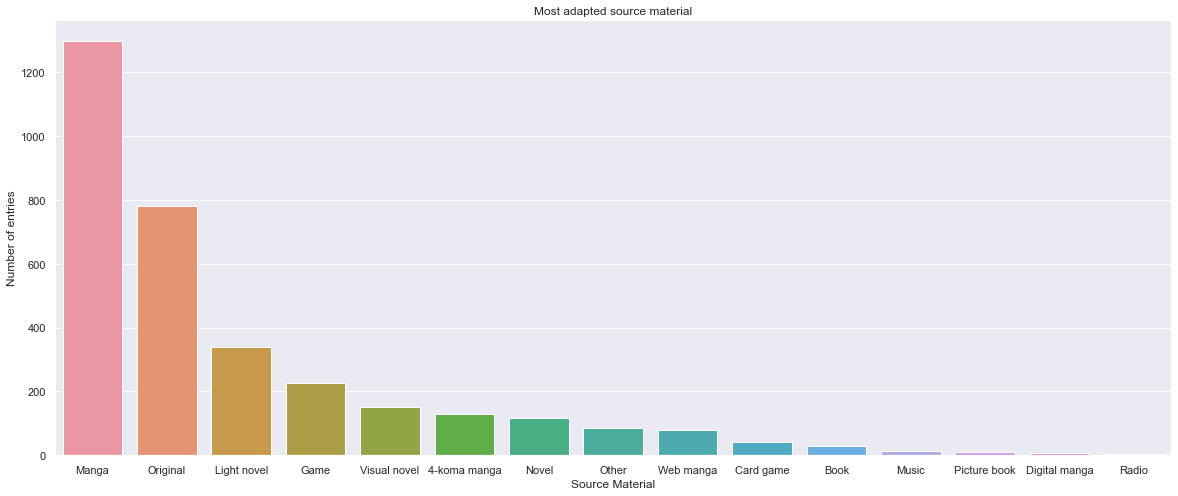

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,8))

ax = sns.countplot(x = 'Source',
              data = pdf,
              order = pdf['Source'].value_counts().index)

plt.xlabel("Source Material")
plt.ylabel("Number of entries")
plt.title("Most adapted source material")

# Random Questions
I was trying to find out whats the biggest genre in anime and to my surprise, `Comedy`, `Action`, `Drama`, `Romance` and `Fantasy` is the Top 5 pick for best individual genre.

In [ ]:
# genreList = pdf["Genres"].value_counts()

# print(genreList)
genreList = pf.returnList(pdf, 'Genres')
genreNumOccurances = pf.countOccurances(genreList)
genreIndividualOccurances = pf.countWordsInDict(genreNumOccurances)

xd = pd.DataFrame(genreIndividualOccurances.items(), columns=['Genre', 'Count'])

xd = xd.sort_values(by=['Count'], ascending=False)

xd.head()
    

,Genre,Count
2,Comedy,935
0,Action,792
3,Drama,601
14,Romance,545
11,Fantasy,532


Text(0.5, 1.0, 'Top Genre')

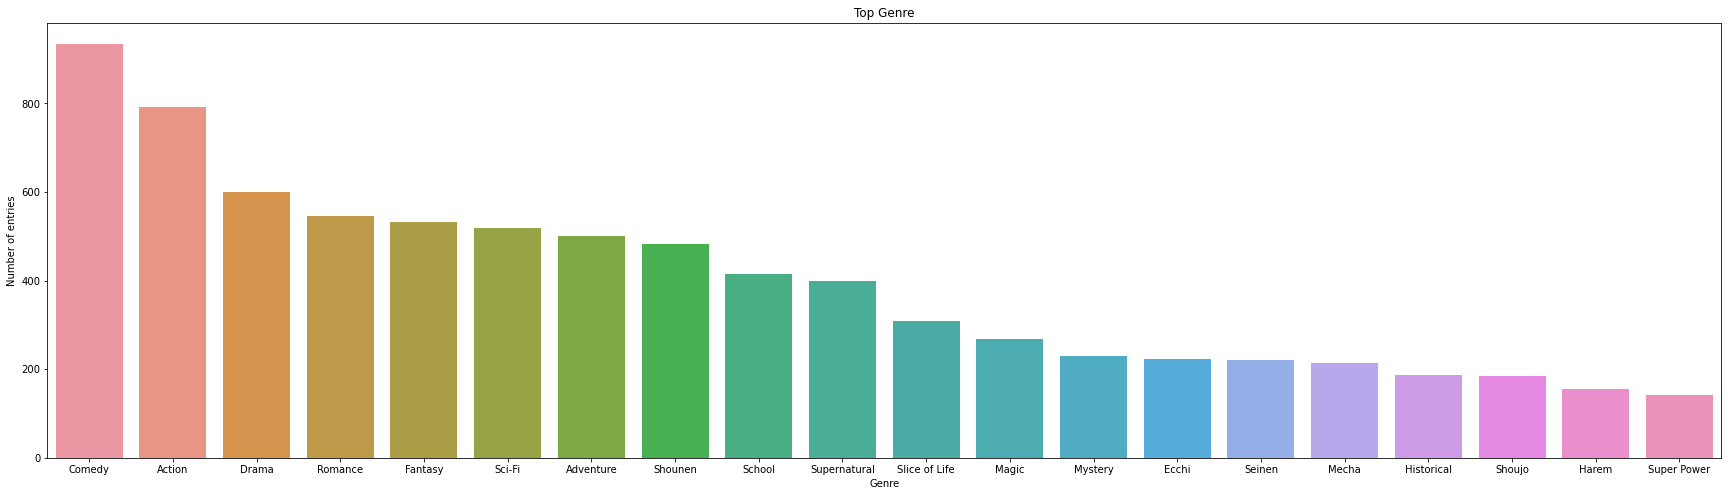

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.barplot(x = 'Genre', y = 'Count', data = xd.head(20))

plt.xlabel("Genre")
plt.ylabel("Number of entries")
plt.title("Top Genre")

# Question 2 : 
How does the duration of an anime affect the completion rate of the anime: Essentially, we want to see if the more prolonged the anime is, how many people end up sticking with finishing to watch that anime.

Based on the research, we have found out that there's little to no correlation between the number of `Episodes` and `Dropped / Member Ratio`, however, there's a strong correlation between `Dropped / Members Ratio` when compared with `Score`.

Based on the top 10 anime that was `Dropped`, we can see that the episode number doesn't play a major role to it, most of the anime in top 10 are in in the standard `12` or `13` episode range.

But we noticed that the anime with a high number of `Dropped / Members Ratio` usually have a low `Score`.


* `Dropped / Members Ratio` (Higher = More dropped)

In [ ]:
q2df = pdf[['Name','Members','Episodes','Dropped','Score','Duration (Minutes)']]
q2df['Dropped / Members Ratio'] = q2df['Dropped'] / q2df['Members']
q2df = q2df.sort_values(by=['Dropped / Members Ratio'], ascending=False)
q2df.head(20)

,Name,Members,Episodes,Dropped,Score,Duration (Minutes),Dropped / Members Ratio
3103,Ex-Arm,46649,12,14271,2.18,23,0.305923
2675,The Reflection,26983,12,7807,5.14,25,0.289330
1222,Penguin no Mondai,641,100,185,5.88,10,0.288612
3163,Hakata Mentai! Pirikarako-chan,2360,12,677,5.05,4,0.286864
2482,Shounen Ashibe: Go! Go! Goma-chan,2568,32,732,6.12,9,0.285047
2635,100% Pascal-sensei (TV),2220,36,628,5.72,12,0.282883
2072,Hero Bank,2571,51,727,6.05,23,0.282769
963,MapleStory,4257,25,1180,5.33,25,0.277191
2543,Time Bokan 24,4134,24,1123,5.89,23,0.271650
2490,Endride,61776,24,16759,5.65,23,0.271287


With focus on the number of `Dropped` instead.

The number of people dropping (`Dropped`) the anime is high but so is the number of people watching it (`Members`). However, those anime listed here is also considered the most popular anime of all time, therefore we think that there's no correlation between the number of `Episodes` and the number of usert who `Dropped` the anime. 

In [ ]:
q2df = pdf[['Name','Aired','Members','Episodes','Dropped','Score','Duration (Minutes)']]
q2df['Dropped / Members Ratio'] = q2df['Dropped'] / q2df['Members']
# q2df = q2df.sort_values(by=['Dropped / Members Ratio'], ascending=False)

q2df = q2df.sort_values(by=['Dropped'], ascending=False)
q2df.head(10)


,Name,Aired,Members,Episodes,Dropped,Score,Duration (Minutes),Dropped / Members Ratio
182,Bleach,"Oct 5, 2004 to Mar 27, 2012",1286382,366,174710,7.80,24,0.135815
1437,Fairy Tail,"Oct 12, 2009 to Mar 30, 2013",1312470,175,148408,7.68,24,0.113075
740,Naruto: Shippuuden,"Feb 15, 2007 to Mar 23, 2017",1543765,500,124253,8.16,23,0.080487
9,Naruto,"Oct 3, 2002 to Feb 8, 2007",1830540,220,99806,7.91,23,0.054523
1721,Sword Art Online,"Jul 8, 2012 to Dec 23, 2012",2214395,25,90661,7.25,23,0.040942
2692,Black Clover,"Oct 3, 2017 to Mar 30, 2021",860404,170,89594,7.38,23,0.104130
653,Death Note,"Oct 4, 2006 to Jun 27, 2007",2589552,37,80834,8.63,23,0.031215
1962,Kill la Kill,"Oct 4, 2013 to Mar 28, 2014",1283021,24,67845,8.11,24,0.052879
2068,Sword Art Online II,"Jul 5, 2014 to Dec 20, 2014",1437210,24,67243,6.79,23,0.046787
1126,Soul Eater,"Apr 7, 2008 to Mar 30, 2009",1218423,51,65962,7.88,24,0.054137


In [ ]:
q2df = pdf[['Name','Aired','Members','Episodes','Dropped','Score','Duration (Minutes)']]
q2df['Dropped / Members Ratio'] = q2df['Dropped'] / q2df['Members']
# q2df = q2df.sort_values(by=['Dropped / Members Ratio'], ascending=False)

q2df = q2df.sort_values(by=['Members'], ascending=False)
q2df.head(20)

,Name,Aired,Members,Episodes,Dropped,Score,Duration (Minutes),Dropped / Members Ratio
653,Death Note,"Oct 4, 2006 to Jun 27, 2007",2589552,37,80834,8.63,23,0.031215
1892,Shingeki no Kyojin,"Apr 7, 2013 to Sep 29, 2013",2531397,25,44635,8.48,24,0.017633
1298,Fullmetal Alchemist: Brotherhood,"Apr 5, 2009 to Jul 4, 2010",2248456,64,32456,9.19,24,0.014435
1721,Sword Art Online,"Jul 8, 2012 to Dec 23, 2012",2214395,25,90661,7.25,23,0.040942
2297,One Punch Man,"Oct 5, 2015 to Dec 21, 2015",2123866,12,26755,8.57,24,0.012597
2440,Boku no Hero Academia,"Apr 3, 2016 to Jun 26, 2016",1909814,13,19212,8.11,24,0.010060
2085,Tokyo Ghoul,"Jul 4, 2014 to Sep 19, 2014",1895488,12,38668,7.81,24,0.020400
9,Naruto,"Oct 3, 2002 to Feb 8, 2007",1830540,220,99806,7.91,23,0.054523
1568,Steins;Gate,"Apr 6, 2011 to Sep 14, 2011",1771162,24,35600,9.11,24,0.020100
1994,No Game No Life,"Apr 9, 2014 to Jun 25, 2014",1751054,12,37820,8.20,23,0.021598


# Conclusion
The `duration` of an anime doesn't affect the completion rate as much as we'd thought it would based on the `Dropped / Members Ratio`, however we did notice a big correlation between `Score` and `Dropped / Members Ratio`. 

